In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
path1 = os.path.join("data", "mouse_drug_data.csv")
path2 = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(path1)
clinical_df = pd.read_csv(path2)

# Combine the data into a single dataset
df = pd.merge(mouse_df, clinical_df, on = "Mouse ID", how = 'outer')

# Display the data table for preview
df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

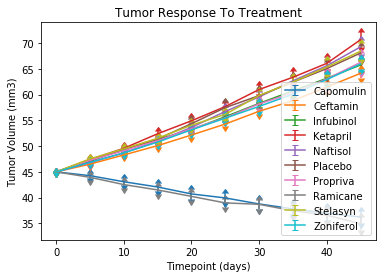

In [82]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

col_list = ['Drug', 'Timepoint']
tumor = 'Tumor Volume (mm3)'

def group_mean(df, group_cols, out_col):
    return pd.DataFrame(df.groupby(group_cols).mean()[out_col])


def group_sem(df, group_cols, out_col):
    return pd.DataFrame(df.groupby(group_cols).sem()[out_col])

def group_count(df, group_cols, out_col):
    return pd.DataFrame(df.groupby(group_cols).count()[out_col])

tum_vol = group_mean(df, col_list, tumor)
tum_sem = group_sem(df, col_list, tumor)

# Minor Data Munging to Re-Format the Data Frames
def tranpose_multindex(df, col):
    df = df.reset_index().pivot('Timepoint', 'Drug', col)
    return df

T_tum_vol = tranpose_multindex(tum_vol, tumor)
T_tum_sem = tranpose_multindex(tum_sem, tumor)
##how can i generalize this function??

# Generate the Plot (with Error Bars)
plt.title('Tumor Response To Treatment')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
xaxis = df.Timepoint.unique()
for col in T_tum_vol:
    plt.errorbar(xaxis, T_tum_vol[col], yerr = T_tum_sem[col], uplims=True, lolims=True, label = col)
plt.legend()

plt.show()

# Save the Figure

## Metastatic Response to Treatment

In [83]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame# Preview DataFrame
meta = 'Metastatic Sites'

met_site_mean = group_mean(df, col_list, meta)
met_site_sem = group_sem(df, col_list, meta)

# Minor Data Munging to Re-Format the Data Frames
T_met_site_mean = tranpose_multindex(met_site_mean,meta)
T_met_site_sem = tranpose_multindex(met_site_sem, meta)

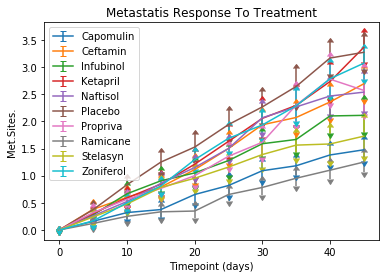

In [84]:
# Generate the Plot (with Error Bars)
plt.title('Metastatis Response To Treatment')

plt.xlabel('Timepoint (days)')
plt.ylabel('Met.Sites.')
#xaxis = df.Timepoint.unique()
for col in T_met_site_mean:
    plt.errorbar(xaxis, T_met_site_mean[col], yerr = T_met_site_sem[col], uplims=True, lolims=True, label = col)
plt.legend()

plt.show()
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [87]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mic = 'Mouse ID'
m = group_count(df, col_list, mic)
T_m = tranpose_multindex(m, mic)

T_m


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


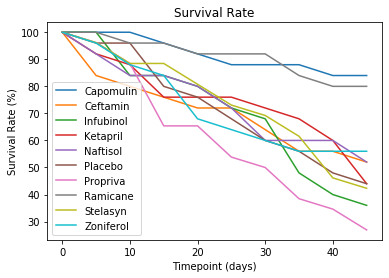

In [93]:
# Generate the Plot (Accounting for percentages)

plt.title('Survival Rate')

plt.xlabel('Timepoint (days)')
plt.ylabel('Survival Rate (%)')
#xaxis = df.Timepoint.unique()
for col in T_m:
    plt.errorbar(xaxis, ((T_m[col]/T_m.loc[0, col]) * 100), uplims=True, lolims=True, label = col)
plt.legend()

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [100]:
# Calculate the percent changes for each drug
T_tum_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [138]:
drug_list = []
change_list = []
for col in T_tum_vol:
    drug_list.append(col)
    change_list.append((T_tum_vol.loc[45, col] - T_tum_vol.loc[0, col]) / T_tum_vol.loc[0, col])

change_per = [ "{:.2%}".format(e) for e in change_list]

change_df = pd.DataFrame({"Drug": drug_list, 
                          "Percent": [e * 100 for e in change_list],
                          "Percent Change" : change_per})
# Display the data to confirm
change_df

,Drug,Percent,Percent Change
0,Capomulin,-19.475303,-19.48%
1,Ceftamin,42.516492,42.52%
2,Infubinol,46.123472,46.12%
3,Ketapril,57.028795,57.03%
4,Naftisol,53.923347,53.92%
5,Placebo,51.297960,51.30%
6,Propriva,47.241175,47.24%
7,Ramicane,-22.320900,-22.32%
8,Stelasyn,52.085134,52.09%
9,Zoniferol,46.579751,46.58%


In [137]:
# Store all Relevant Percent Changes into a Tuple
prop_tup = tuple(change_df.Percent)


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)